<h1>Compresión de color en imágenes con K-means<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

En este notebook vamos a intentar simplificar una imagen reduciendo su número de colores, aplicando un algoritmo no supervisado: K-means.

In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings; warnings.simplefilter('ignore')  # fix NumPy issues.

from sklearn.datasets import load_sample_image # requiere el paquete pillow
from sklearn.cluster import MiniBatchKMeans

Cargamos una imagen de ejemplo incluida en sklearn:

china.shape: (427, 640, 3)


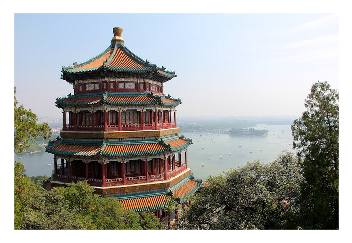

In [2]:
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
print("china.shape:", china.shape)
ax.imshow(china);

La imagen está compuesta por 427x640 píxeles, con la representación RGB para cada uno de ellos. Reformateamos los datos para que cada pixel sea una variable del dataset:

In [3]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print(data.shape)

(273280, 3)


Podemos crear una visualización de estos pixeles en el espacio de color (usaremos un subconjunto de 10000 pixeles)

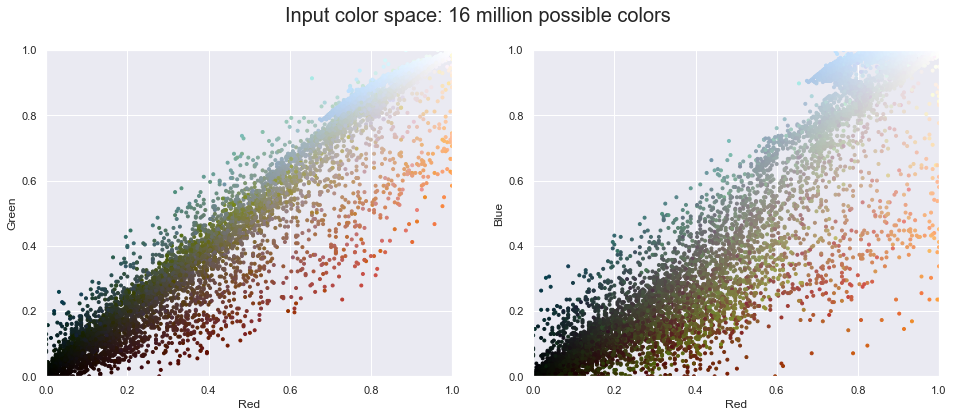

In [4]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')

Vamos a reducir esos 16 millones de colores a sólo 16, usando K-Means con mini-batch, ya que el dataset es muy grande:

In [5]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
print("new_colors.shape:", new_colors.shape)

new_colors.shape: (273280, 3)


Pintamos de nuevo el espacio de color de los 10000 pixeles de muestra, usando los nuevos colores, y comparamos con los originales:

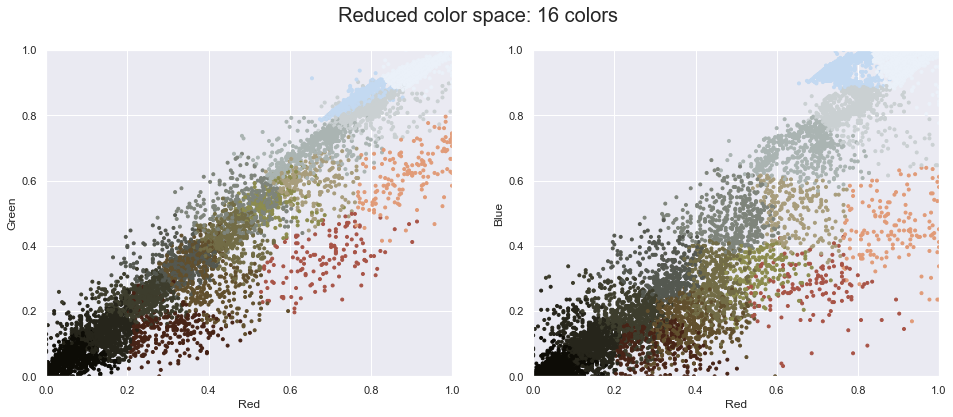

In [6]:
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Vemos que el resultado parece bastante similar al original. Comprobamos como queda la imagen final: 

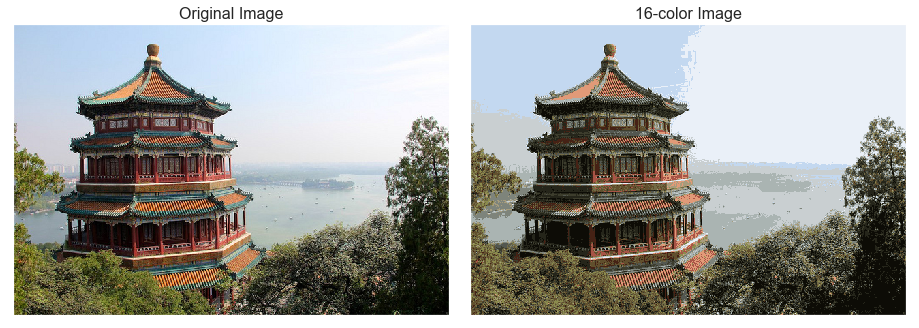

In [7]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

La diferencia a la vista es notable, pero la información más importante de la foto sigue ahí. Hemos conseguido pasar de 16 millones de posibles valores discretos a sólo 16, lo que supone un factor de compresión de 1 millón!

Aunque existen mejores métodos para comprimir la información en imágenes, este ejemplo muestra muy bien las posibilidades de aplicar métodos de aprendizaje no supervisados.